In [2]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt

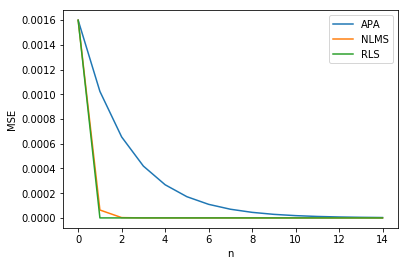

In [3]:
############################################# 6.20 #############################################

R   = 200           #R dimension
n   = 15            #number of iterations
var = 0.01          #variance
std = var**0.5      #standard deviation

theta_0 = np.random.normal(0,1,(R,1))  #initializing unknown parameter vector
x_n     = np.random.normal(0,1,(R,1))  #input variables Rx1
n_n     = np.random.normal(0,std)      #white Gaussian noise

y_n = theta_0.T @ x_n + n_n            #output according to the model

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% APA %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
miu  = 0.2                  #APA algorithm parameter
delt = 0.001                #APA algorithn parameter
q    = 30                   #APA reusing algorithm parameter

X_n = np.zeros((q,R))       #saving space for qxl input matrix
Y_n = np.zeros((q,1))       #saving space for qx1 output matrix

for i in range(q):          #generating X_n and Y_n matrices
    X_n[i] = x_n.T
    Y_n[i] = y_n.T

theta_nAPA = theta_0.copy()
e1_vec = []                 #saving space for MSE
 
for i in range(n):          #5.2 Algorithm
    e_nAPA     = Y_n - X_n @ theta_nAPA
    matrix     = delt * np.identity(q) + X_n @ X_n.T
    theta_nAPA += miu * (X_n.T @ np.linalg.inv(matrix) @ e_nAPA)
    
    e1_vec.append(e_nAPA[0]**2)     #MSE vector
 
plt.plot(range(n),e1_vec)           #plotting MSE vs n

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% NLMS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
miu  = 1.2                      #NLMS algorithm parameter
delt = 0.001                    #NLMS algorithm parameter

theta_n = theta_0.copy()
e2_vec = []                     #saving space for MSE

for i in range(n):              #5.3 Algorithm
    e_n = y_n - theta_n.T @ x_n
    theta_n += (miu / (delt + x_n.T @ x_n)) * x_n * e_n
    
    e2_vec.append(e_n**2)       #MSE vector
    
plt.plot(range(n),np.squeeze(e2_vec))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% RLS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
beta = 1                        #RLS algorithm parameter
lamb = 1                        #RLS algorithm parameter
P_n  = np.identity(R)           #initializing identity P matrix

theta_nRLS = theta_0.copy()
e3_vec = []                     #saving space for MSE

for i in range(n):              #6.1 Algorithm
    e_nRLS     = y_n - theta_nRLS.T @ x_n
    z_n        = P_n @ x_n
    K_n        = z_n / (beta + x_n.T @ z_n)
    theta_nRLS += K_n * e_nRLS
    P_n        = (1/beta)* P_n - (1/beta) * K_n @ z_n.T
    
    e3_vec.append(e_nRLS**2)    #MSE vector
    
plt.plot(range(n),np.squeeze(e3_vec))      #plotting results
plt.legend(['APA','NLMS','RLS'])
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

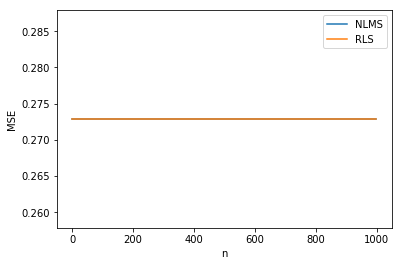

In [4]:
############################################# 6.21 #############################################

R   = 5                 #R dimension
n   = 1000              #number of iterations

alpha = 0.97            #LMS nonstationary parameter

w_n = np.random.normal(0,0.1**0.5,(R,1)) #random vector for time varying model
theta_00 = np.random.normal(0,1,(R,1))   #initializing unknown parameter vector
Theta_0n = [] #saving space for time varying unknown parameter vector arange

x_n      = np.random.normal(0,1,(R,1))      #input variables Rx1
n_n      = np.random.normal(0,0.001**0.5)   #white Gaussian noise
 
for i in range(n): #creating time varying unknown parameter vector arrange
    theta_0n = alpha*theta_00 + w_n     #Eq 5.77
    Theta_0n.append(theta_0n)
    
y_n = theta_00.T @ x_n + n_n            #Eq 6.81

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% NLMS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
miu  = 0.5                              #NLMS algorithm parameter
delt = 0.001                            #NLMS algorithm parameter

theta_0n = theta_00.copy()
e1_vec = []                             #saving space for MSE

for i in range(n):                      #5.3 Algorithm
    e_n = y_n - Theta_0n[i].T @ x_n
    theta_0n += (miu / (delt + x_n.T @ x_n)) * x_n * e_n
    
    e1_vec.append(e_n**2)               #MSE vector
    
plt.plot(range(n),np.squeeze(e1_vec))
    
#%%RLS
beta = 0.995                    #RLS algorithm parameter
lamb = 1                        #RLS algorithm parameter
P_n  = np.identity(R)           #initializing identity P matrix

theta_nRLS = theta_00.copy()
e2_vec = []                     #saving space for MSE

for i in range(n):              #6.1 Algorithm
    e_nRLS     = y_n - Theta_0n[i].T @ x_n
    z_n        = P_n @ x_n
    K_n        = z_n / (beta + x_n.T @ z_n)
    theta_nRLS += K_n * e_nRLS
    P_n        = (1/beta)* P_n - (1/beta) * K_n @ z_n.T
    
    e2_vec.append(e_nRLS**2)    #MSE vector
    
plt.plot(range(n),np.squeeze(e2_vec))      #plotting results
plt.legend(['NLMS','RLS'])
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

In [5]:
############################################# 6.22 #############################################

R = 90                                  #R dimension

X       = np.random.normal(0,1,(150,R)) #entries matrix N(0,1)
theta_0 = np.random.normal(0,1,(R,1))   #initializing unknown parameter vector

y = X @ theta_0                         #output vector

yn = y + np.random.normal(0,0.01,(150,1))   #noisy output vector

E  = np.random.normal(0,0.2,(150,R))    #noise matrix
Xn = X + E                              #noisy input matrix 
        
#%%(a)    LS estimate with input X and noisy output yn
X_pi = np.linalg.inv(X.T @ X) @ X.T
theta_LSa = X_pi @ yn
dist_LSa = np.linalg.norm(theta_0-theta_LSa)    #Euclidean distance wrt theta_0

#%%(b)    LS estimate with noisy input Xn and noisy output yn
Xn_pi = np.linalg.inv(Xn.T @ Xn) @ Xn.T
theta_LSb = Xn_pi @ yn
dist_LSb = np.linalg.norm(theta_0-theta_LSb)    #Euclidean distance wrt theta_0

#%%(c)    TLS estimate with noisy input Xn and noisy output yn
Xy = np.zeros((150,R+1))    
for i in range(150):    #generating (Nx(l+1)) matrix [X|y] according to Eq 6.70
    for j in range(R):
        Xy[i,j] = X[i,j]
    Xy[i,90] = y[i]
    
eig     = np.linalg.eigvals(Xy @ Xy.T)  #eigenvalues of [X|y]
eig_nz = []                             #saving space for nonzero eigenvalues
for i in eig:                           #searching for nonzero eigenvalues
    if i >= 0.001:
        eig_nz.append(i)
        
sigma_l1 = min(eig_nz)**0.5     #lowest nonzero eigenvalue according to Eq 6.71

matrix = ((Xn.T @ Xn) - (sigma_l1**2 * np.identity(R)))  
theta_TLS = np.linalg.inv(matrix) @ Xn.T @ yn            #Eq 6.78
dist_TLS = np.linalg.norm(theta_0-theta_TLS)    #Euclidean distance wrt theta_0

print('The Euclidian distance using LS with X and yn is: ',dist_LSa)
print('The Euclidian distance using LS with Xn and yn is: ',dist_TLS)
print('The Euclidian distance using TLS with Xn and yn is: ',dist_LSb)

The Euclidian distance using LS with X and yn is:  0.010635185850381633
The Euclidian distance using LS with Xn and yn is:  26.934781801187025
The Euclidian distance using TLS with Xn and yn is:  2.1776915863074944
